# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import preprocessing
from sklearn import cluster 
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn import cluster 
import seaborn as sns 

# EDA

## Importing the dataset

In [2]:
cars=pd.read_csv("all-cars.csv")

In [3]:
cars.shape

(428, 15)

In [4]:
cars.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225,18,24,3880,115,197


In [5]:
cars.tail(4)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565,40083,2.3,5.0,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210,42573,2.9,6.0,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,26135,24641,1.9,4.0,170,22,29,2822,101,180
427,Volvo,XC70,Wagon,Europe,All,35145,33112,2.5,5.0,208,20,27,3823,109,186


In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    int64  
 6   Invoice      428 non-null    int64  
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 50.3+ KB


### Weight distribution

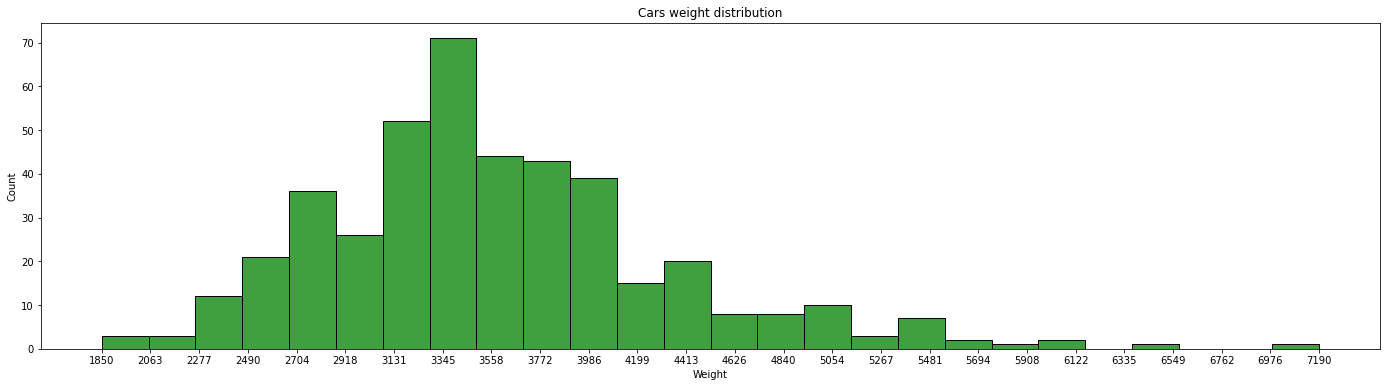

In [7]:
plt.figure(figsize=(24, 6))
plt.title('Cars weight distribution')
ax = sns.histplot(cars['Weight'].sort_values(), bins=26,color='g')
plt.xticks(np.linspace(cars['Weight'].min(),cars['Weight'].max(), 26, dtype=int, endpoint = True))
plt.show()

### Length distribution

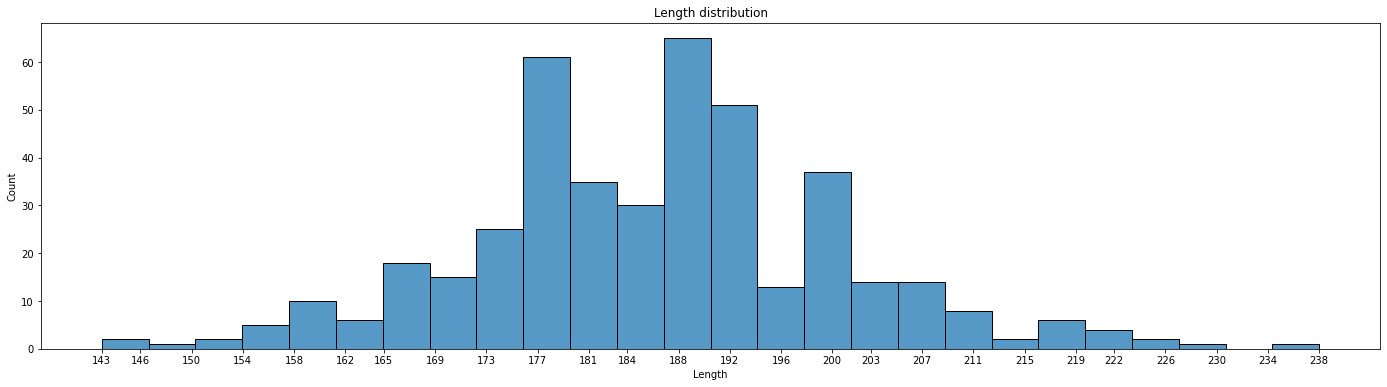

In [8]:
plt.figure(figsize=(24, 6))
plt.title('Length distribution')
ax = sns.histplot(cars['Length'].sort_values(), bins=26)
plt.xticks(np.linspace(cars['Length'].min(),cars['Length'].max(), 26, dtype=int, endpoint = True))
plt.show()

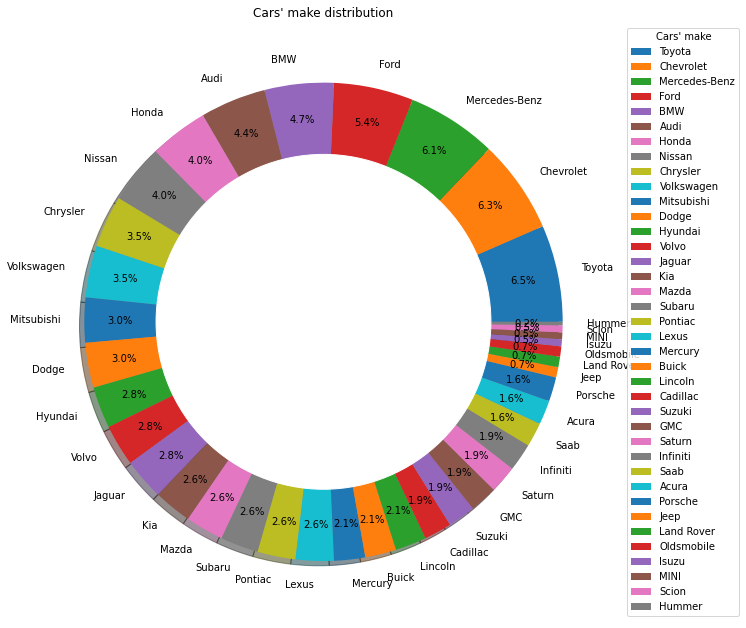

In [9]:
sizes = dict(cars['Make'].value_counts())

plt.figure(figsize=(11, 11))
plt.title("Cars' make distribution")
plt.pie(sizes.values(), labels=sizes.keys(), autopct="%.1f%%", pctdistance=0.85, shadow=True)
plt.legend(title="Cars' make", labels=sizes.keys(), bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

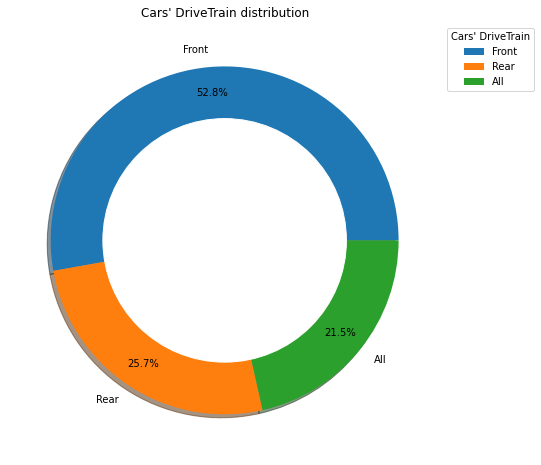

In [10]:
sizes = dict(cars['DriveTrain'].value_counts())

plt.figure(figsize=(12, 8))
plt.title("Cars' DriveTrain distribution")
plt.pie(sizes.values(), labels=sizes.keys(), autopct="%.1f%%", pctdistance=0.85, shadow=True)
plt.legend(title="Cars' DriveTrain", labels=sizes.keys(), bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

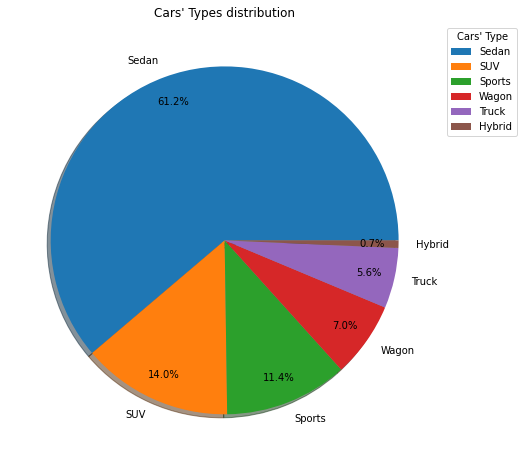

In [11]:
sizes = dict(cars['Type'].value_counts())

plt.figure(figsize=(12, 8))
plt.title("Cars' Types distribution")
plt.pie(sizes.values(), labels=sizes.keys(), autopct="%.1f%%", pctdistance=0.85, shadow=True)
plt.legend(title="Cars' Type", labels=sizes.keys(), bbox_to_anchor=(1, 1))



plt.show()

In [12]:
cars.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP             int64
Invoice          int64
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

In [13]:
cars.describe(include='all')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428,428,428,428,428,428.000000,428.000000,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
unique,38,425,6,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Toyota,C320 4dr,Sedan,Asia,Front,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,28,2,262,158,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,32774.855140,30014.700935,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,NaN,NaN,NaN,NaN,NaN,19431.716674,17642.117750,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,NaN,NaN,NaN,NaN,NaN,10280.000000,9875.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,NaN,NaN,NaN,NaN,NaN,20334.250000,18866.000000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,NaN,NaN,NaN,NaN,NaN,27635.000000,25294.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,NaN,NaN,NaN,NaN,NaN,39205.000000,35710.250000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000


In [14]:
cars.nunique()

Make            38
Model          425
Type             6
Origin           3
DriveTrain       3
MSRP           410
Invoice        425
EngineSize      43
Cylinders        7
Horsepower     110
MPG_City        28
MPG_Highway     33
Weight         348
Wheelbase       40
Length          67
dtype: int64

In [15]:
cars.isna().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [16]:
cars.isna().sum().sum()

2

In [17]:
cars['Origin'].value_counts()

Asia      158
USA       147
Europe    123
Name: Origin, dtype: int64

In [18]:
cars['DriveTrain'].value_counts()

Front    226
Rear     110
All       92
Name: DriveTrain, dtype: int64

In [19]:
cars.Make.value_counts()

Toyota           28
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              20
Audi             19
Honda            17
Nissan           17
Chrysler         15
Volkswagen       15
Mitsubishi       13
Dodge            13
Hyundai          12
Volvo            12
Jaguar           12
Kia              11
Mazda            11
Subaru           11
Pontiac          11
Lexus            11
Mercury           9
Buick             9
Lincoln           9
Cadillac          8
Suzuki            8
GMC               8
Saturn            8
Infiniti          8
Saab              7
Acura             7
Porsche           7
Jeep              3
Land Rover        3
Oldsmobile        3
Isuzu             2
MINI              2
Scion             2
Hummer            1
Name: Make, dtype: int64

In [20]:
cars['Type'].unique()

array(['SUV', 'Sedan', 'Sports', 'Wagon', 'Truck', 'Hybrid'], dtype=object)

In [21]:
cars['Type'].value_counts()

Sedan     262
SUV        60
Sports     49
Wagon      30
Truck      24
Hybrid      3
Name: Type, dtype: int64

In [22]:
cars["Cylinders"].describe()

count    426.000000
mean       5.807512
std        1.558443
min        3.000000
25%        4.000000
50%        6.000000
75%        6.000000
max       12.000000
Name: Cylinders, dtype: float64

In [23]:
cars["Cylinders"].mode().iloc[0]

6.0

In [24]:
cars.fillna(cars["Cylinders"].mode().iloc[0],inplace=True)

In [25]:
cars.isna().sum().sum()

0

In [26]:
cars['Model'].value_counts()

 C320 4dr                    2
 G35 4dr                     2
 C240 4dr                    2
 Crown Victoria LX 4dr       1
 Astro                       1
                            ..
 GS 430 4dr                  1
 F-150 Regular Cab XL        1
 Odyssey LX                  1
 Forenza S 4dr               1
 Town and Country Limited    1
Name: Model, Length: 425, dtype: int64

In [27]:
cars.drop(['Model'],axis=1,inplace=True)

## Change the variables' type

In [28]:
cars['Origin'].replace({'Asia':1,'USA':2,'Europe':3},inplace=True)

In [29]:
cars['DriveTrain'].replace({'Front':1,'Rear':2,'All':3},inplace=True)

In [30]:
cars['Type'].replace({'SUV':1, 'Sedan':2, 'Sports':3, 'Wagon':4, 'Truck':5, 'Hybrid':6},inplace=True)

In [31]:
dic_Make={'Toyota': 1,
 'Chevrolet': 2,
 'Mercedes-Benz': 3,
 'Ford': 4,
 'BMW': 5,
 'Audi': 6,
 'Honda': 7,
 'Nissan': 8,
 'Volkswagen': 9,
 'Chrysler': 10,
 'Mitsubishi': 11,
 'Dodge': 12,
 'Volvo': 13,
 'Hyundai': 14,
 'Jaguar': 15,
 'Pontiac': 16,
 'Kia': 17,
 'Mazda': 18,
 'Lexus': 19,
 'Subaru': 20,
 'Mercury': 21,
 'Buick': 22,
 'Lincoln': 23,
 'Suzuki': 24,
 'Infiniti': 25,
 'GMC': 26,
 'Cadillac': 27,
 'Saturn': 28,
 'Acura': 29,
 'Saab': 30,
 'Porsche': 31,
 'Jeep': 32,
 'Land Rover': 33,
 'Oldsmobile': 34,
 'MINI': 35,
 'Isuzu': 36,
 'Scion': 37,
 'Hummer': 38}

In [32]:
cars.Make.replace(dic_Make,inplace=True)

In [33]:
cars.head()

,Make,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,29,1,1,3,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,29,2,1,1,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,29,2,1,1,26990,24647,2.4,4.0,200,22,29,3230,105,183
3,29,2,1,1,33195,30299,3.2,6.0,270,20,28,3575,108,186
4,29,2,1,1,43755,39014,3.5,6.0,225,18,24,3880,115,197


In [34]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    int64  
 1   Type         428 non-null    int64  
 2   Origin       428 non-null    int64  
 3   DriveTrain   428 non-null    int64  
 4   MSRP         428 non-null    int64  
 5   Invoice      428 non-null    int64  
 6   EngineSize   428 non-null    float64
 7   Cylinders    428 non-null    float64
 8   Horsepower   428 non-null    int64  
 9   MPG_City     428 non-null    int64  
 10  MPG_Highway  428 non-null    int64  
 11  Weight       428 non-null    int64  
 12  Wheelbase    428 non-null    int64  
 13  Length       428 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 46.9 KB


In [35]:
cars.describe()

,Make,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,13.116822,2.310748,1.918224,1.686916,32774.855140,30014.700935,3.196729,5.808411,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,9.621181,1.028483,0.807079,0.804039,19431.716674,17642.117750,1.108595,1.554844,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,1.000000,1.000000,1.000000,1.000000,10280.000000,9875.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,5.000000,2.000000,1.000000,1.000000,20334.250000,18866.000000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,11.000000,2.000000,2.000000,1.000000,27635.000000,25294.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,20.000000,2.000000,3.000000,2.000000,39205.000000,35710.250000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,38.000000,6.000000,3.000000,3.000000,192465.000000,173560.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


# PCA

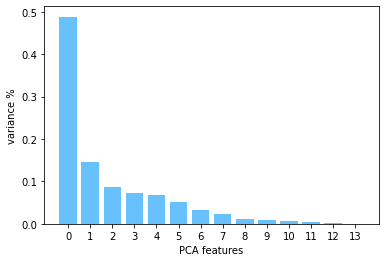

In [36]:
# Standardize the data to have a mean of ~0 and a variance of 1
cars_std = StandardScaler().fit_transform(cars)
# Create a PCA instance: pca
acp = PCA(svd_solver='full')
principalComponents = acp.fit_transform(cars_std)
# Plot the explained variances
features = range(acp.n_components_)
plt.bar(features, acp.explained_variance_ratio_, color='#68C1FC')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [37]:
cars.shape

(428, 14)

In [38]:
print(cars.keys())
print(cars.shape) 
#nombre d'observations/lignes
n =cars.shape[0]
#nombre de variables/colonnes
p =cars.shape[1]


Index(['Make', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice', 'EngineSize',
       'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight',
       'Wheelbase', 'Length'],
      dtype='object')
(428, 14)


In [39]:
#Par la propriété .explained_variance_ (calcul de la variance expliquée)
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[6.83412525e+00 2.02713386e+00 1.22590272e+00 1.00413487e+00
 9.36903822e-01 7.11137081e-01 4.60834920e-01 3.07136798e-01
 1.71588280e-01 1.25021995e-01 9.13425852e-02 7.08902032e-02
 3.30843282e-02 7.63288161e-04]


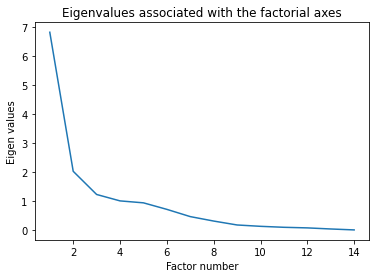

In [40]:
plt.plot(np.arange(1,p+1),eigval)
plt.title("Eigenvalues associated with the factorial axes")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

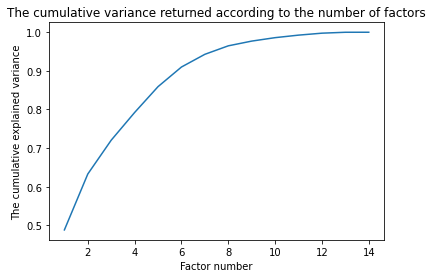

In [41]:
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("The cumulative variance returned according to the number of factors")
plt.ylabel("The cumulative explained variance")
plt.xlabel("Factor number")
plt.show()

In [42]:
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

    Val.Propre    Seuils
0     6.834125  3.251562
1     2.027134  2.251562
2     1.225903  1.751562
3     1.004135  1.418229
4     0.936904  1.168229
5     0.711137  0.968229
6     0.460835  0.801562
7     0.307137  0.658705
8     0.171588  0.533705
9     0.125022  0.422594
10    0.091343  0.322594
11    0.070890  0.231685
12    0.033084  0.148352
13    0.000763  0.071429


In [43]:
di = np.sum(cars_std**2,axis=1)
print(pd.DataFrame({'ID':cars.index,'d_i':di}))

      ID        d_i
0      0  11.189773
1      1  11.808700
2      2   7.645280
3      3   5.478785
4      4   7.329355
..   ...        ...
423  423   4.105359
424  424   4.459397
425  425   4.343265
426  426  10.795418
427  427   8.019373

[428 rows x 2 columns]


In [44]:
print("PCA components: ",acp.components_)
sqrt_eigval = np.sqrt(eigval)
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]
print(corvar)
print(pd.DataFrame({'id':cars.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

PCA components:  [[-1.82380581e-02  2.04629975e-02 -1.35493632e-01 -1.85436874e-01
  -2.78429554e-01 -2.76595291e-01 -3.46865830e-01 -3.42756787e-01
  -3.34175777e-01  3.23928945e-01  3.21561084e-01 -3.35513422e-01
  -2.51576860e-01 -2.42512010e-01]
 [-2.29269273e-02 -2.14955327e-03  3.72256668e-01  7.46610792e-02
   4.27717885e-01  4.32020145e-01 -9.38344237e-02  1.42202693e-02
   2.06385652e-01  7.58302824e-02  1.11970686e-01 -2.08733130e-01
  -4.33763528e-01 -4.29099406e-01]
 [-5.90507401e-01  6.54305435e-01  1.60547615e-01 -2.80365164e-02
   4.73137713e-02  5.01657233e-02  4.82983539e-02  5.76165730e-02
   3.52016910e-02  2.32563162e-01  2.31480679e-01 -4.14853194e-02
   2.06075178e-01  1.81989375e-01]
 [ 1.56647643e-01  4.60759124e-01 -7.39085883e-02  7.45971109e-01
  -1.15380670e-01 -1.20073377e-01 -9.21641002e-02 -1.56158247e-01
  -8.41859358e-02 -1.38076062e-01 -2.46625150e-01  2.48023849e-02
  -9.76110502e-02 -2.08561562e-01]
 [ 7.02540380e-01  4.62152323e-01 -2.51450237e-01 -

### Circle of correlations

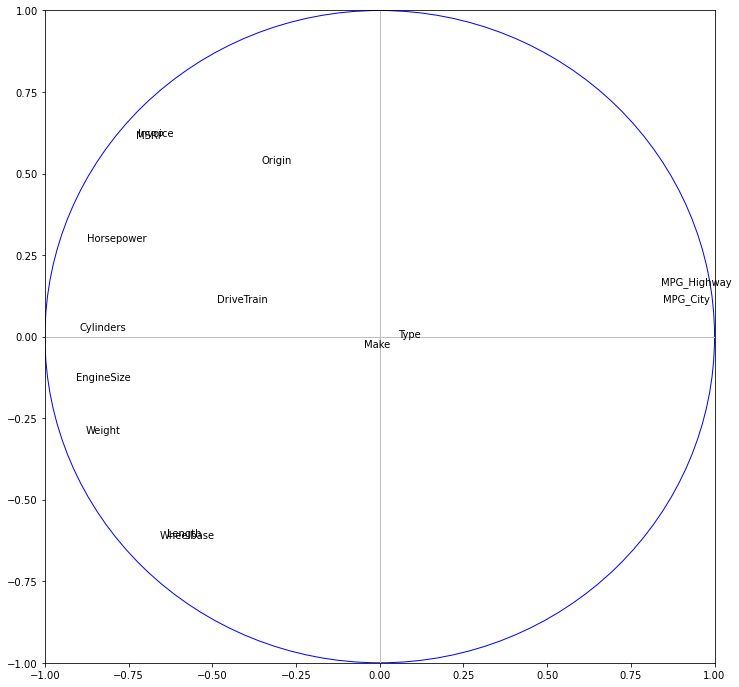

In [45]:

fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
for j in range(p):
    plt.annotate(cars.columns[j],(corvar[j,0],corvar[j,1]))
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
plt.show()

In [46]:
cos2var = corvar**2
print(pd.DataFrame({'id':cars.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

             id    COS2_1    COS2_2
0          Make  0.002273  0.001066
1          Type  0.002862  0.000009
2        Origin  0.125464  0.280910
3    DriveTrain  0.235004  0.011300
4          MSRP  0.529802  0.370849
5       Invoice  0.522844  0.378347
6    EngineSize  0.822254  0.017849
7     Cylinders  0.802888  0.000410
8    Horsepower  0.763190  0.086346
9      MPG_City  0.717104  0.011656
10  MPG_Highway  0.706659  0.025415
11       Weight  0.769312  0.088321
12    Wheelbase  0.432538  0.381407
13       Length  0.401929  0.373249


In [47]:
#Contribution des variables aux axes 
#contributions
cos2var = corvar**2
ctrvar = cos2var
for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les deux premiers axes
ctr=pd.DataFrame({'id':cars.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]})

In [48]:
ctr['CTR_1'].sum()

0.9999999999999999

In [49]:
var= acp.explained_variance_ratio_
var

array([4.88151803e-01, 1.44795276e-01, 8.75644801e-02, 7.17239195e-02,
       6.69217016e-02, 5.07955058e-02, 3.29167800e-02, 2.19383427e-02,
       1.22563057e-02, 8.93014251e-03, 6.52447037e-03, 5.06358594e-03,
       2.36316630e-03, 5.45205829e-05])

In [50]:
var1=np.cumsum(np.round(acp.explained_variance_ratio_, decimals=4)*100)

In [51]:
var1

array([ 48.82,  63.3 ,  72.06,  79.23,  85.92,  91.  ,  94.29,  96.48,
        97.71,  98.6 ,  99.25,  99.76, 100.  , 100.01])

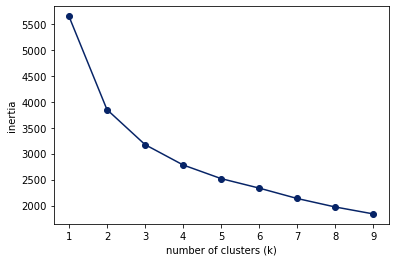

In [52]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = cluster.KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:7])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='#072467')
plt.xlabel('number of clusters (k)')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import pylab as pl
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib.lines import Line2D

df = pd.DataFrame(PCA_components.iloc[:,:7])

kmeans = KMeans(n_clusters=2,max_iter=100)
df["Cluster"] = kmeans.fit_predict(df)

df

,0,1,2,3,4,5,6,Cluster
0,-1.453847,-0.372585,-2.334461,1.086907,0.339935,0.630204,1.126810,1
1,2.673271,0.276375,-1.478388,-0.040691,1.389429,0.327237,-0.091330,0
2,1.713955,-0.347518,-1.400485,-0.165912,1.438357,0.116107,-0.047780,0
3,0.043976,-0.310353,-1.261442,-0.562956,1.643216,0.572280,-0.116518,0
4,-1.009940,-0.904766,-1.173591,-0.664773,1.709794,0.223576,-0.004478,1
...,...,...,...,...,...,...,...,...
423,0.527831,1.061885,0.029517,-0.847221,-0.156631,-1.211629,-0.285330,0
424,0.117313,1.236417,-0.067722,-0.803991,-0.135912,-1.068913,-0.550106,0
425,-0.860371,0.937541,0.141152,-1.101605,0.015375,-0.976799,-0.417828,1
426,2.109223,0.958209,1.101190,0.446208,0.446489,-1.379546,-1.305140,0


In [54]:
df['Cluster'].value_counts()

0    250
1    178
Name: Cluster, dtype: int64

In [55]:
df[df['Cluster'] == 0]

,0,1,2,3,4,5,6,Cluster
1,2.673271,0.276375,-1.478388,-0.040691,1.389429,0.327237,-0.091330,0
2,1.713955,-0.347518,-1.400485,-0.165912,1.438357,0.116107,-0.047780,0
3,0.043976,-0.310353,-1.261442,-0.562956,1.643216,0.572280,-0.116518,0
7,1.982420,0.749328,0.368379,-0.640416,-0.968549,-1.284923,-0.374470,0
8,1.485520,0.996818,0.438844,-0.758230,-0.816792,-1.272468,-0.064334,0
...,...,...,...,...,...,...,...,...
422,-0.317205,0.628700,0.025760,0.999098,-0.814961,-1.410130,1.046839,0
423,0.527831,1.061885,0.029517,-0.847221,-0.156631,-1.211629,-0.285330,0
424,0.117313,1.236417,-0.067722,-0.803991,-0.135912,-1.068913,-0.550106,0
426,2.109223,0.958209,1.101190,0.446208,0.446489,-1.379546,-1.305140,0


In [56]:
df[df['Cluster'] == 1]

,0,1,2,3,4,5,6,Cluster
0,-1.453847,-0.372585,-2.334461,1.086907,0.339935,0.630204,1.126810,1
4,-1.009940,-0.904766,-1.173591,-0.664773,1.709794,0.223576,-0.004478,1
5,-1.082077,-0.805527,-1.162648,-0.692502,1.749653,0.241352,0.036506,1
6,-1.629381,3.074288,-0.992856,0.622127,2.477211,1.550690,0.077927,1
10,-0.481080,1.067662,0.045220,1.124229,-1.614417,-0.626159,0.226281,1
...,...,...,...,...,...,...,...,...
412,-6.778008,0.928361,0.654531,-2.319281,0.280851,0.478942,-0.589077,1
415,-1.527244,0.866909,1.472945,-0.279688,0.390997,-0.344116,-1.458128,1
416,-2.320894,0.373890,-0.997969,0.731606,-1.516004,-1.121008,0.633786,1
420,-0.741186,1.309962,-0.275641,1.179773,-0.859432,-0.883655,0.366642,1


# Profiling

{'samples': [250, 178], 'Cluster': ['Cluster 0', 'Cluster 1']}


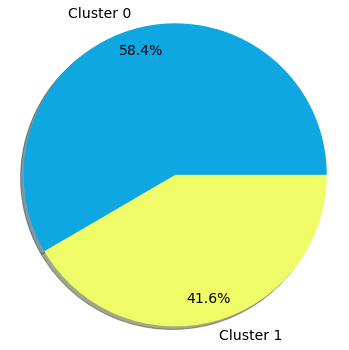

In [57]:

legend= []

colors = ['#0FA7E2','#EFFC68']


pie = {"samples":[],"Cluster":[]}
for i in (np.unique(kmeans.labels_)):
   
    legend.append(Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i),markerfacecolor=colors[i], markersize=15))
    pie["samples"].append(df[df["Cluster"]==i].shape[0])
    pie["Cluster"].append("Cluster {}".format(i))





print(pie)
# Pie chart
plt.figure(figsize=(6,6))
plt.pie(pie["samples"], labels=pie["Cluster"], colors=colors,autopct="%.1f%%", pctdistance=0.85, shadow=True,textprops={'fontsize': 14})
plt.axis('equal')
plt.show()


In [58]:
cars_df=pd.read_csv("all-cars.csv")

In [59]:
cars_df['Cluster']=kmeans.labels_

Text(0.5, 1.0, 'DriveTrain by cylinders')

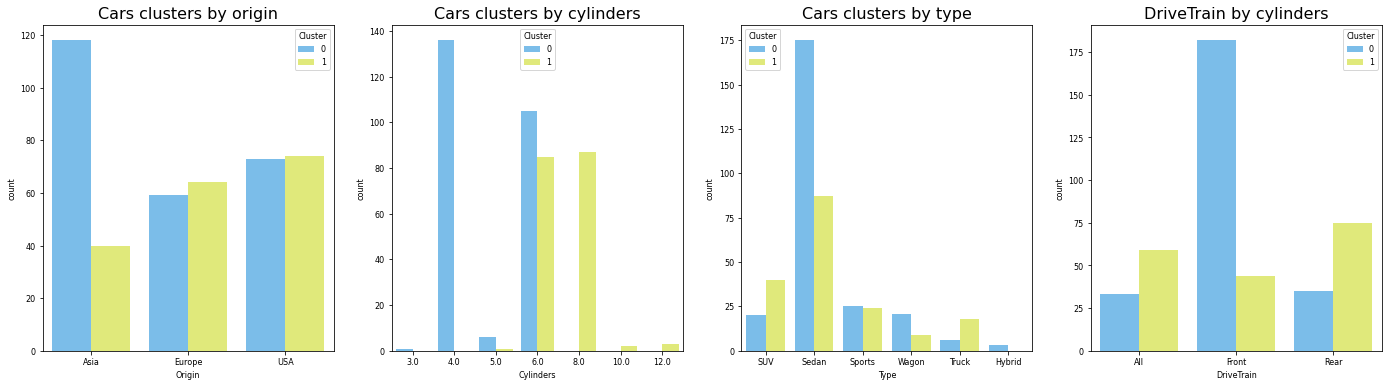

In [60]:
plt.rcParams.update({'figure.figsize':(40,6),'font.size': 8})
f, axes = plt.subplots(ncols=4, figsize=(24,6))
sns.countplot(data=cars_df, x='Origin', hue='Cluster',palette=['#68C1FC','#EFFC68'],ax=axes[0])
axes[0].set_title('Cars clusters by origin', fontsize = 16)
sns.countplot(data=cars_df, x='Cylinders', hue='Cluster',palette=['#68C1FC','#EFFC68'],ax=axes[1])
axes[1].set_title('Cars clusters by cylinders', fontsize = 16)
sns.countplot(data=cars_df, x='Type', hue='Cluster',palette=['#68C1FC','#EFFC68'],ax=axes[2])
axes[2].set_title('Cars clusters by type', fontsize = 16)
sns.countplot(data=cars_df, x='DriveTrain', hue='Cluster',palette=['#68C1FC','#EFFC68'],ax=axes[3])
axes[3].set_title('DriveTrain by cylinders', fontsize = 16)

Text(0.5, 1.0, 'MPG_Highway by cluster')

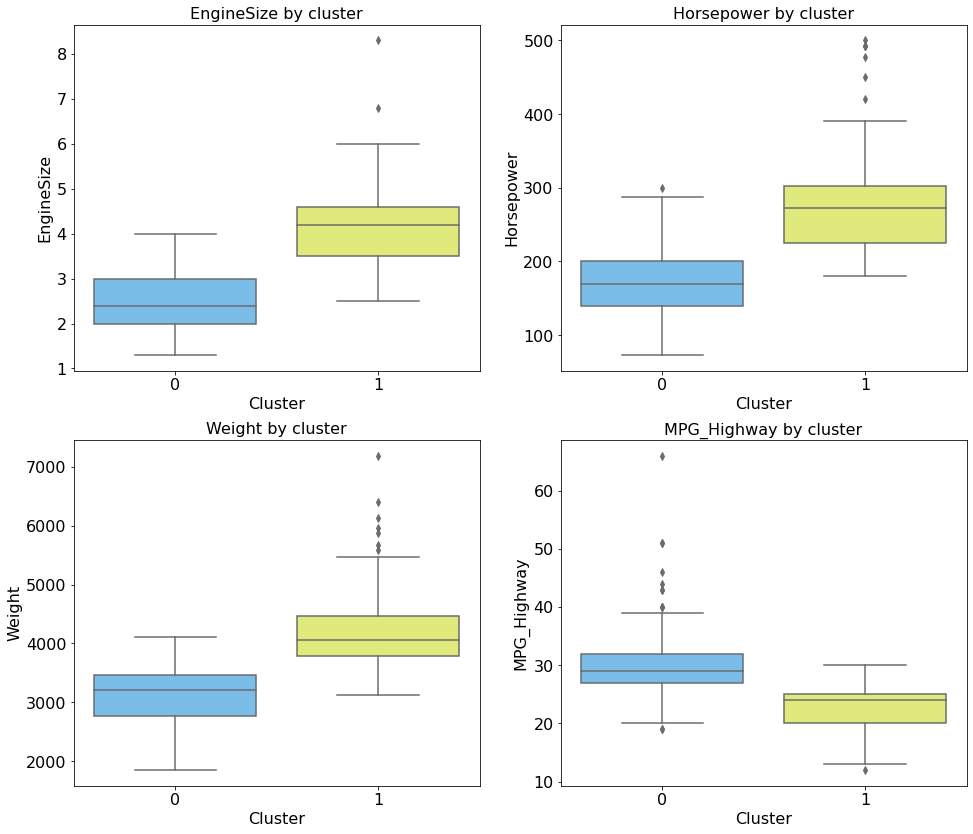

In [61]:
plt.rcParams.update({'figure.figsize':(16,14),'font.size': 16})
f, axes = plt.subplots(nrows=2 ,ncols=2)
sns.boxplot(x='Cluster',y='EngineSize',data=cars_df,palette=['#68C1FC','#EFFC68'],ax=axes[0][0])
axes[0][0].set_title('EngineSize by cluster', fontsize = 16)
sns.boxplot(x='Cluster',y='Horsepower',data=cars_df,palette=['#68C1FC','#EFFC68'],ax=axes[0][1])
axes[0][1].set_title('Horsepower by cluster', fontsize = 16)
sns.boxplot(x='Cluster',y='Weight',data=cars_df,palette=['#68C1FC','#EFFC68'],ax=axes[1][0])
axes[1][0].set_title('Weight by cluster', fontsize = 16)
sns.boxplot(x='Cluster',y='MPG_Highway',data=cars_df,palette=['#68C1FC','#EFFC68'],ax=axes[1][1])
axes[1][1].set_title('MPG_Highway by cluster', fontsize = 16)

In [62]:
cars_df[cars_df['Cluster']==1]['Make'].value_counts()[:15]

Mercedes-Benz    18
Chevrolet        11
Ford             11
Jaguar           11
Audi             11
Lincoln           9
BMW               9
Toyota            8
Cadillac          8
Lexus             7
Infiniti          7
GMC               7
Dodge             7
Nissan            6
Mercury           6
Name: Make, dtype: int64

In [63]:
cars_df[cars_df['Cluster']==0]['Make'].value_counts()[:15]

Toyota           20
Chevrolet        16
Honda            14
Ford             12
Hyundai          12
Subaru           11
Nissan           11
Mitsubishi       11
BMW              11
Mazda            10
Volkswagen       10
Kia              10
Chrysler          9
Volvo             9
Mercedes-Benz     8
Name: Make, dtype: int64

Text(0.5, 1.0, 'Influence of waterfront on the price')

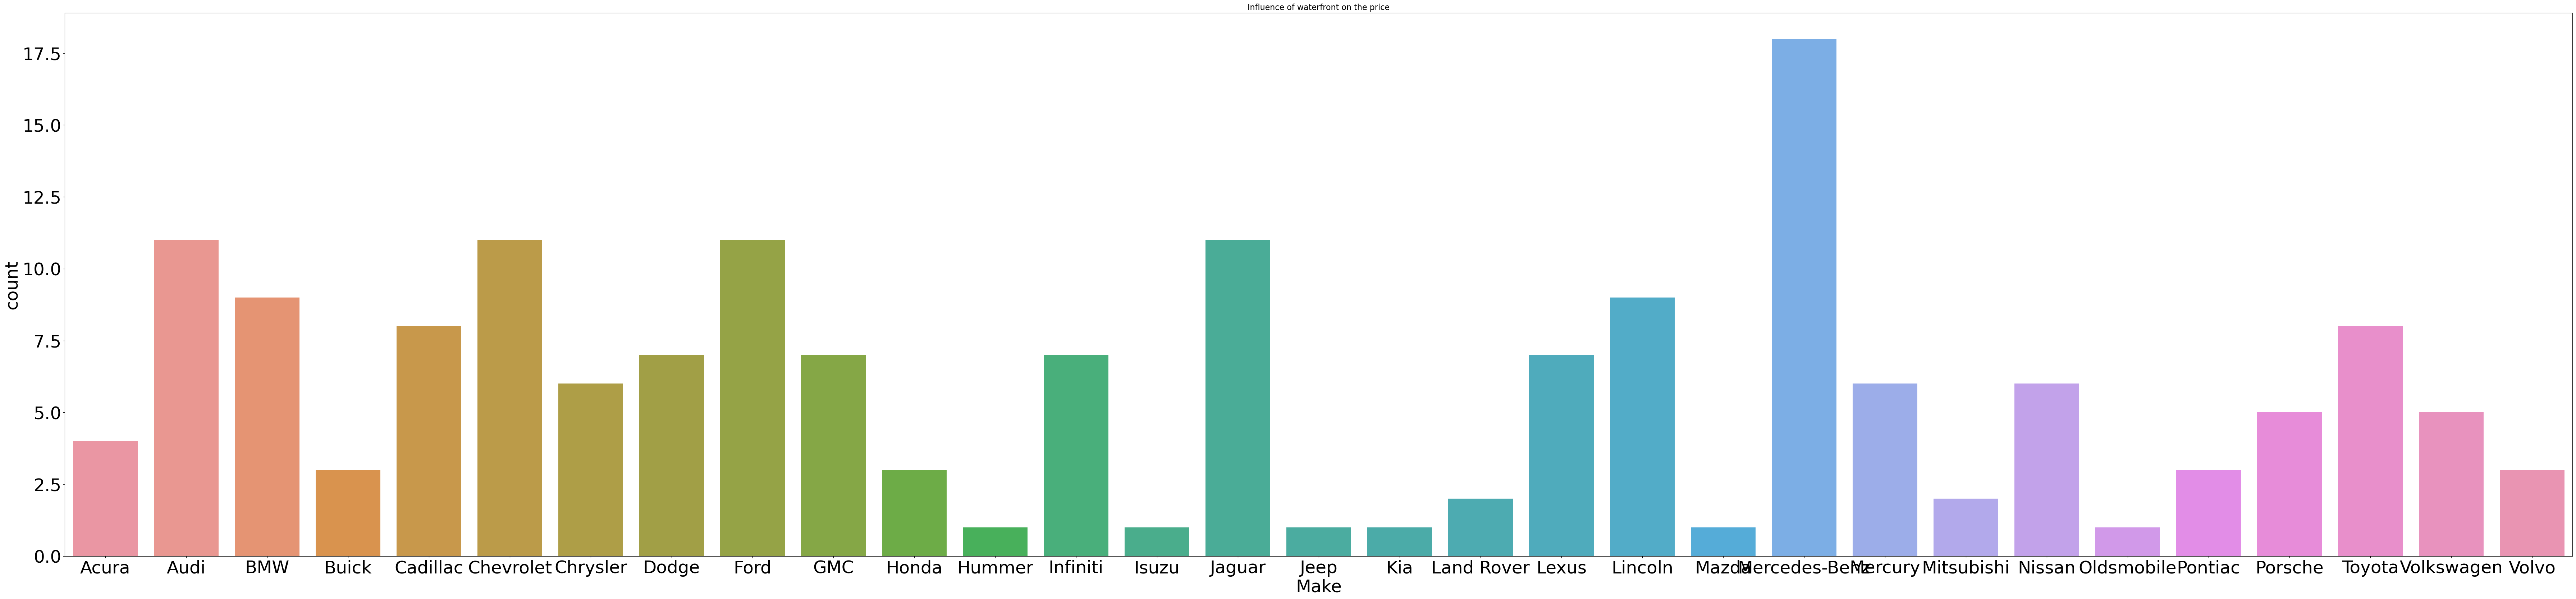

In [64]:
plt.rcParams.update({'figure.figsize':(90,20), 'figure.dpi':100 ,'font.size': 35})
ax=sns.countplot(data=cars_df, x=cars_df[cars_df['Cluster']==1]['Make'])
ax.set_title("Influence of waterfront on the price",fontsize = 16)

Text(0.5, 1.0, 'Influence of waterfront on the price')

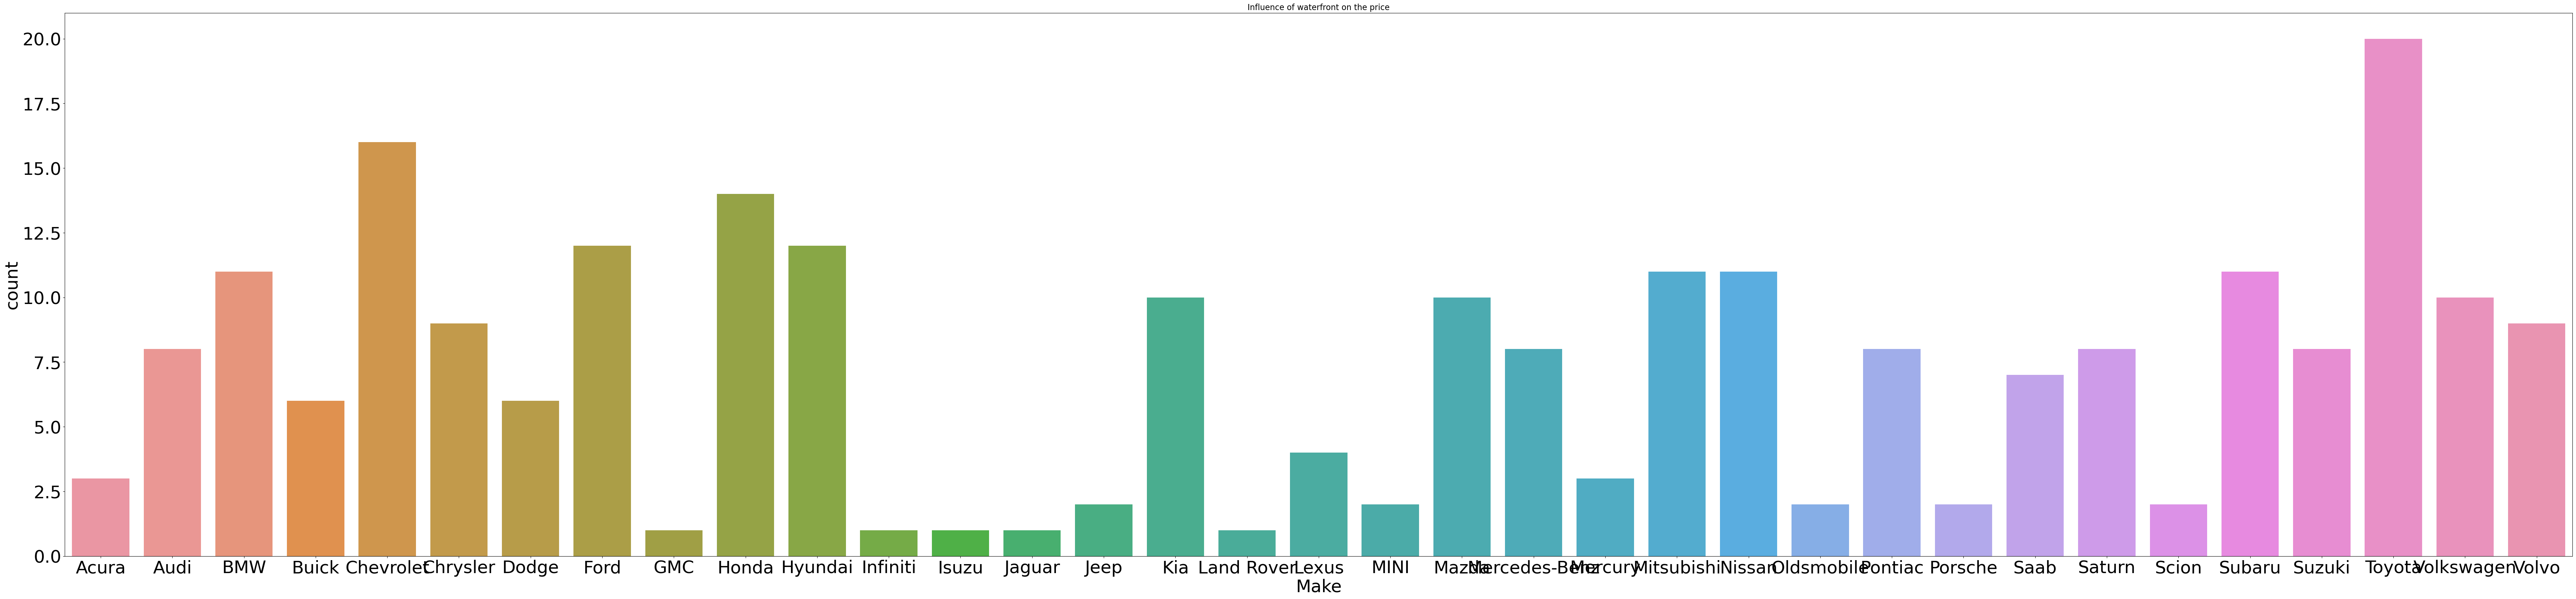

In [65]:
plt.rcParams.update({'figure.figsize':(90,20), 'figure.dpi':100 ,'font.size': 35})
ax=sns.countplot(data=cars_df, x=cars_df[cars_df['Cluster']==0]['Make'])
ax.set_title("Influence of waterfront on the price",fontsize = 16)

Text(0.5, 1.0, 'Influence of waterfront on the price')

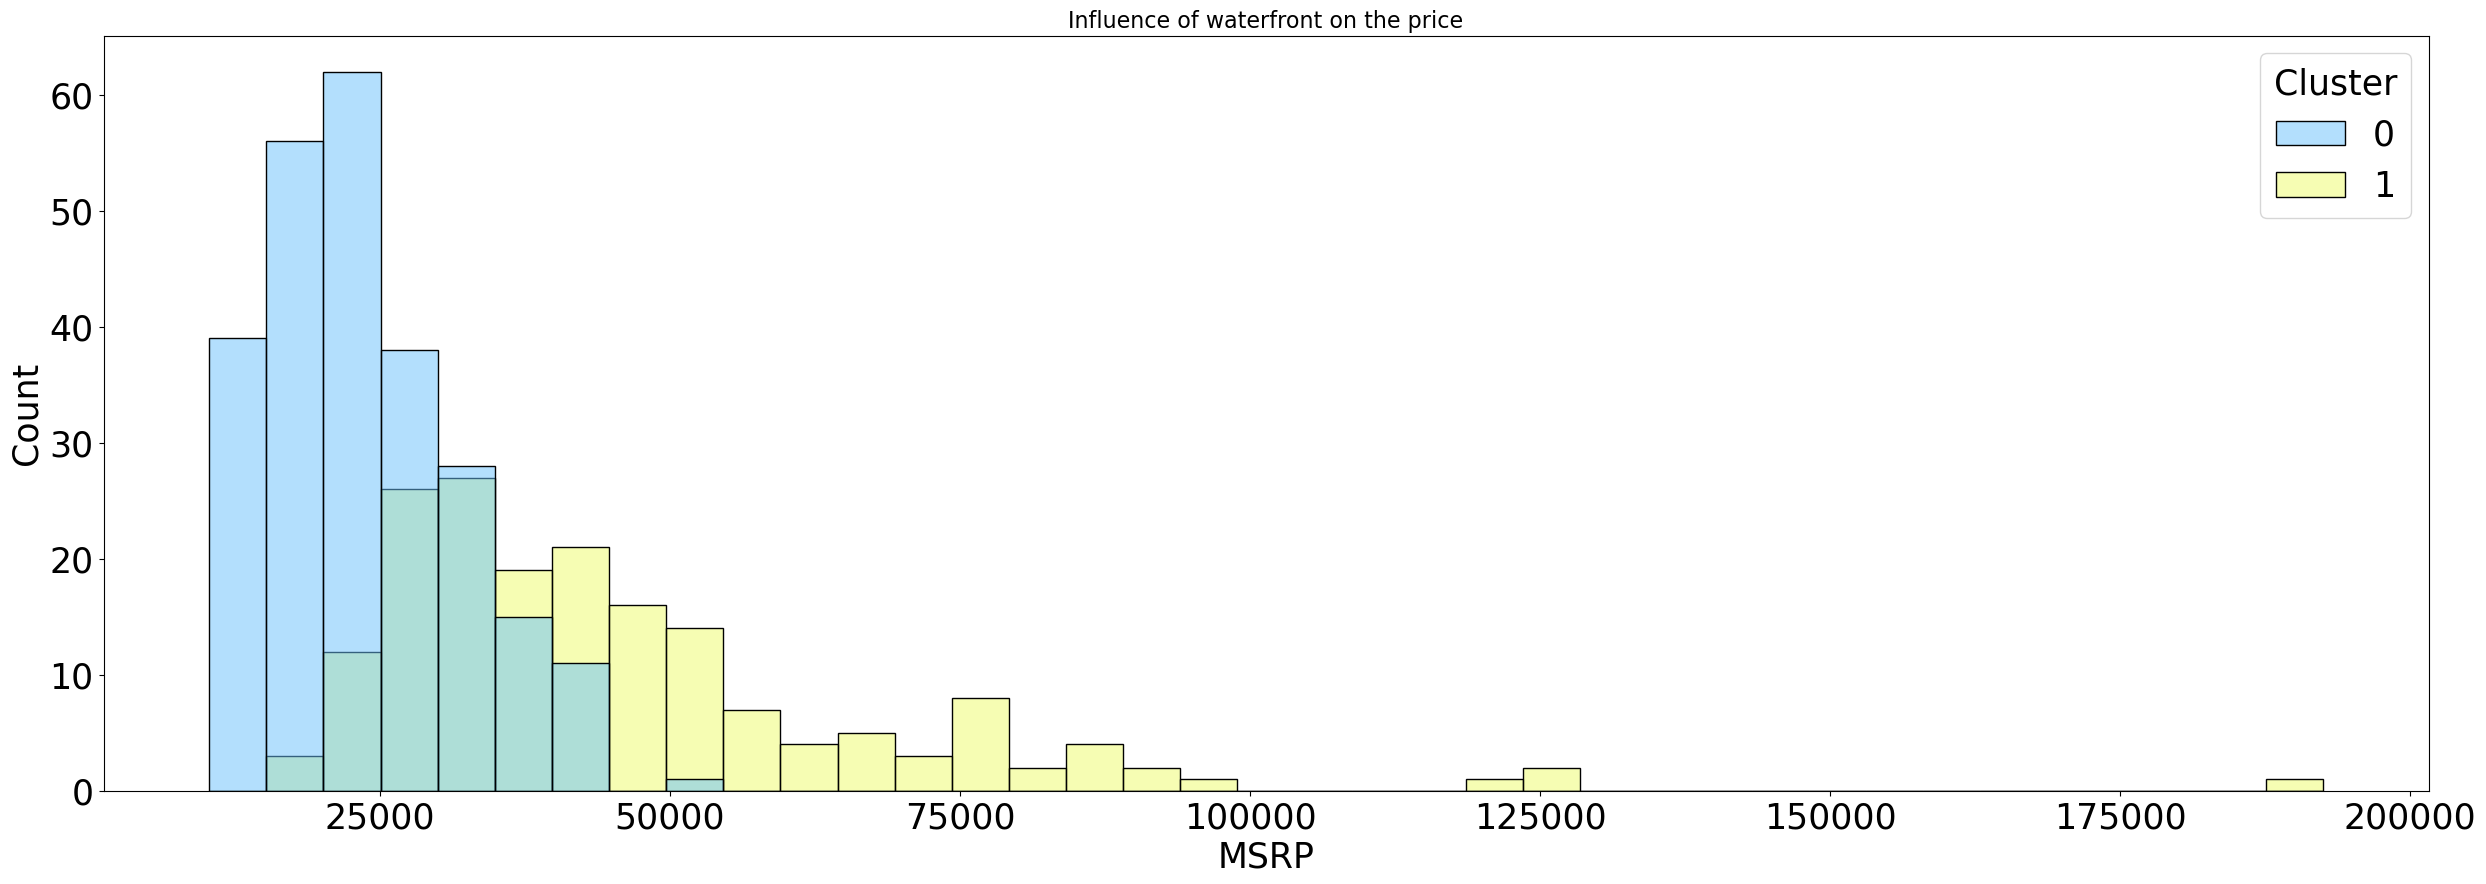

In [66]:
plt.rcParams.update({'figure.figsize':(30,10), 'figure.dpi':100 ,'font.size': 25})
ax=sns.histplot(data=cars_df, x='MSRP',hue='Cluster',palette=['#68C1FC','#EFFC68'])
ax.set_title("Influence of waterfront on the price",fontsize = 16)